### No VR limited 

In [1]:
# SR as '1' sample
import pandas as pd
SR = {}
# Load spreadsheet
xl = pd.ExcelFile('all_cancer_pair.xlsx')

df = xl.parse(xl.sheet_names[0], skiprows=3)

for index, row in df.iterrows():
# Use the first and second column values as a key, and set the value as 1
    SR[row[0], row[1]] = 1

    
df = xl.parse(xl.sheet_names[2], skiprows=2)

for index, row in df.iterrows():
# Use the first and second column values as a key, and set the value as 1
    SR[row[0], row[1]] = 2

print(len(SR))

/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


3000


/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
# Non-SR as '0' sample
from Bio import SeqIO

def extract_gene_symbol(description):
    parts = description.split(' ')
    for part in parts:
        if part.startswith('gene_symbol:'):
            return part.split(':')[1]
    return None

fasta_file = "Homocdsall.fasta"  

cds_dic = {}
for record in SeqIO.parse(fasta_file, "fasta"):
    gene_symbol = extract_gene_symbol(record.description)
    cds_dic[gene_symbol] = str(record.seq)
    
cds_gene_list = []
for k,v in cds_dic.items():       
        cds_gene_list.append(k)
cds_gene_list = list(set(cds_gene_list))
print(len(cds_gene_list))

import random

Non_SR = {}
random.seed(127)
for i in range(30001):
    a = random.randint(0, 19852)
    b = random.randint(0, 19852)
    while a == b:
        b = random.randint(0, 19852)
    if (cds_gene_list[a], cds_gene_list[b]) not in SR:
        
        Non_SR[cds_gene_list[a], cds_gene_list[b]] = 0
    
print(len(Non_SR))

19853
30000


In [3]:
import pickle
with open('cds_DNA_features_dic.pkl', 'rb') as f:    
    cds_features_dic = pickle.load(f)

/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
with open('cds_pro_features_dic.pkl', 'rb') as f:    
    cds_pro_features_dic = pickle.load(f)

In [5]:
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d]))
        y.append(label)        
    except:
        print(gene_pair)
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d]))
        y.append(label)        
    except:
        print(gene_pair)

100%|██████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 68986.40it/s]


('ADPRHL2', 'BICC1')
('ADPRHL2', 'FUT11')
('ADPRHL2', 'IPMK')
('ARHGAP29', 'MRP63')
('ARHGEF1', 'KIAA2018')
('B3GNT4', 'KIAA1704')
('B4GALT2', 'KIAA1704')
('BRE', 'AMFR')
('BUB1', 'OBFC1')
('BUB1B', 'SEPP1')
('C12orf52', 'AKAP11')
('C14orf179', 'MAST1')
('C17orf53', 'CDKN2AIP')
('C17orf53', 'MAST4')
('C4orf32', 'LSR')
('CCDC59', 'ZFYVE20')
('CCNE1', 'MPP5')
('CDCA5', 'SEPP1')
('COL4A3BP', 'XRCC3')
('CRP', 'C6orf165')
('DIABLO', 'KIAA1704')
('DLGAP5', 'SEPP1')
('DYRK1A', 'KIAA1598')
('E2F1', 'SDPR')
('EFNA4', 'KIAA1704')
('EMP1', 'WHSC1')
('ERI3', 'KIAA1704')
('F2', 'CRAMP1L')
('FAM126A', 'RNFT2')
('FAM129B', 'MAST1')
('FAM129B', 'TEK')
('FAM189B', 'TRAK2')
('FAM64A', 'TEK')
('FGD4', 'SUV420H2')
('FOXM1', 'TMEM66')
('GPR113', 'CDH5')
('GRASP', 'NUSAP1')
('GTSE1', 'SEPP1')
('HEATR2', 'SYT15')
('HJURP', 'SEPP1')
('IL15', 'FAM71A')
('KIAA0494', 'PARP1')
('KIAA0649', 'FLT1')
('KIAA0649', 'TEK')
('KIAA1267', 'ERBB2')
('LEPRE1', 'PTAR1')
('LEPRE1', 'TRAF6')
('LEPRE1', 'CHRNB1')
('LEPRE1', 'ST

100%|████████████████████████████████████████████████████| 30000/30000 [00:00<00:00, 58984.95it/s]


In [6]:
len(X)

32752

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [8]:
def run_MLP(X_train, X_test, y_train, y_test, 
            batch_size, learning_rate, weight_decay, num_train_epochs):
    # Apply SMOTE to generate synthetic samples
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # create the MLP model
    model = MLPClassifier(hidden_layer_sizes=(256, 32),
                          activation='relu',
                          solver='adam',
                          alpha=weight_decay,
                          batch_size=batch_size,
                          learning_rate='constant',
                          learning_rate_init=learning_rate,
                          power_t=0.5,
                          max_iter=num_train_epochs,  # train for num_train_epochs at a time
                          shuffle=True,
                          random_state=42,
                          tol=1e-7,  # disable early stopping
                          verbose=False, # not print progress messages
                          validation_fraction=0.1,
                          beta_1=0.9,
                          beta_2=0.999,
                          epsilon=1e-8,
                          n_iter_no_change=10,
                          max_fun=15000)

    train_losses = []
    validation_losses = []
    for _ in range(num_train_epochs):
        # Fit the model for one epoch
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))

        # Get the training loss
        train_loss = model.loss_
        train_losses.append(train_loss)

        # Calculate the validation loss
        validation_proba = model.predict_proba(X_test)
        validation_loss = log_loss(y_test, validation_proba)
        validation_losses.append(validation_loss)
        
        print('train_loss', round(train_loss,3), 'validation_loss', round(validation_loss,3))

    return model, train_losses, validation_losses

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the MLP model
num_train_epochs = 15
model, train_losses, validation_losses = run_MLP(
    X_train, X_test, y_train, y_test, batch_size=100, 
    learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

# Plot train and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(num_train_epochs), train_losses, label='Train')
plt.plot(range(num_train_epochs), validation_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Test Loss')
plt.show()

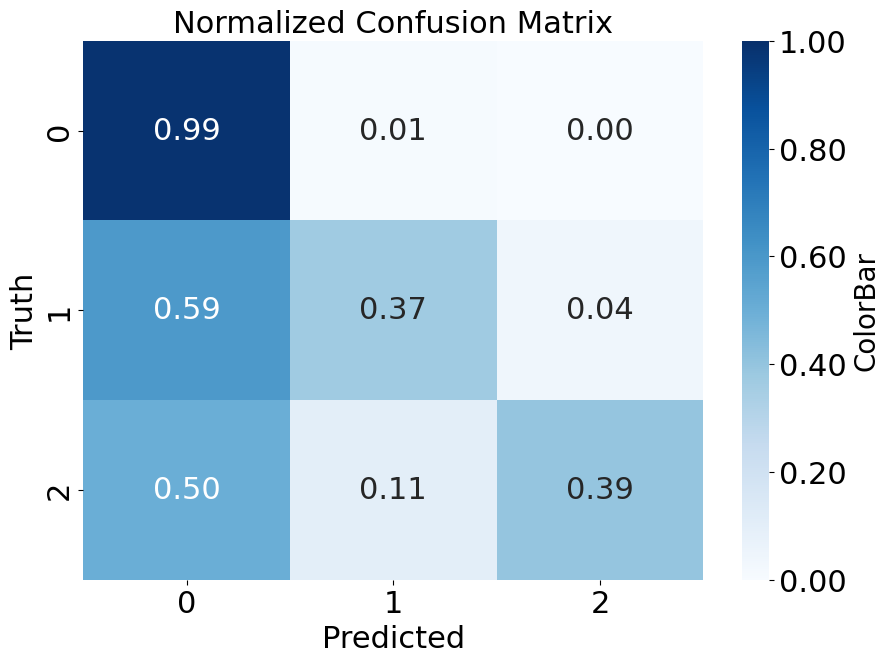

In [14]:
# Predict probabilities for the test data
probs = model.predict_proba(X_test)

# Calculate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# one-time AUC and cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

# Set global font size
plt.rcParams.update({'font.size': 20})

# Normalize the confusion matrix
cm_normalized = normalize(cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 22}, vmin=0, vmax=1, 
            cbar_kws={'label': 'ColorBar', 'format': '%.2f'}) # Set color bar limits   # Change color bar font size
plt.xlabel('Predicted', fontsize=22)
plt.ylabel('Truth', fontsize=22)
plt.title('Normalized Confusion Matrix', fontsize=22)

# Change color bar label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)

# Change axis tick label size
ax.tick_params(axis='both', which='major', labelsize=22)

#plt.savefig('confusion_matrix', dpi = 600)
plt.show()

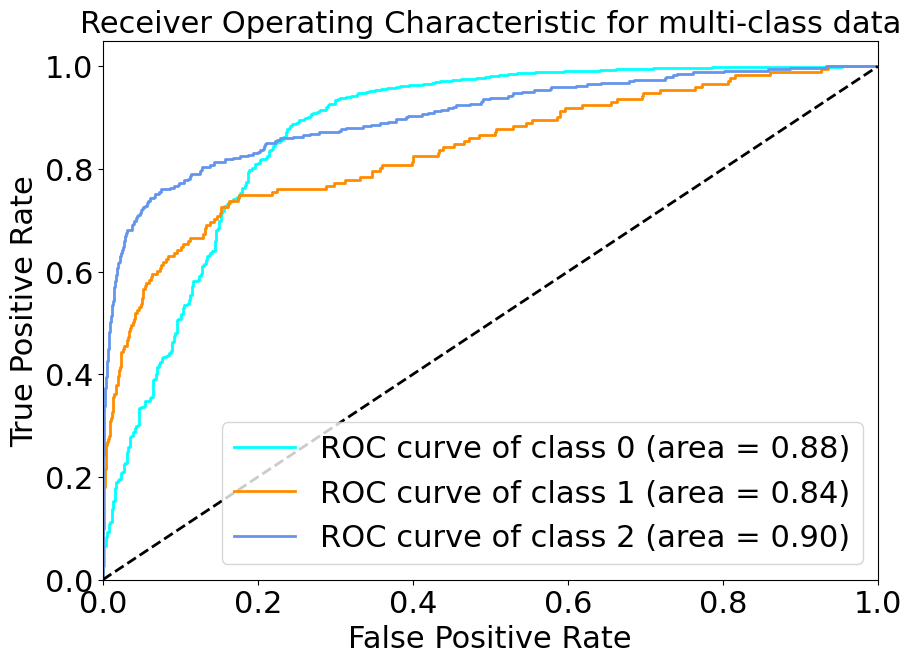

In [13]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
fig, ax = plt.subplots(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    ax.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=22) # Change font size
ax.set_ylabel('True Positive Rate', fontsize=22)  # Change font size
ax.set_title('Receiver Operating Characteristic for multi-class data', fontsize=22) # Change font size
ax.legend(loc="lower right", fontsize=22) 

# Change axis tick label size
ax.tick_params(axis='both', which='major', labelsize=22)

#plt.savefig('AUC', dpi = 600)
plt.show()

### V limited 

In [15]:
def extract_gene_symbol(description):
    parts = description.split(' ')
    for part in parts:
        if part.startswith('gene_symbol:'):
            return part.split(':')[1]
    return None


    
def get_common_gene():
    # cds_gene_set
    cds_dic = {}
    fasta_file = "Homocdsall.fasta"  
    for record in SeqIO.parse(fasta_file, "fasta"):
        gene_symbol = extract_gene_symbol(record.description)
        if gene_symbol != None:
            cds_dic[gene_symbol] = str(record.seq)
    print("cds_dic:", len(cds_dic))
    cds_gene_set = set(cds_dic.keys())
    
    # cds_pro_set
    pep_dic = {}
    fasta_file = "Homopepall.fasta"  
    for record in SeqIO.parse(fasta_file, "fasta"):
        gene_symbol = extract_gene_symbol(record.description)
        if gene_symbol != None:
            pep_dic[gene_symbol] = str(record.seq)
    print("pep_dic:", len(pep_dic))
    cds_pro_set = set(pep_dic.keys())
    
    
    # common_gene_list
    common_gene_list = list(cds_gene_set & cds_pro_set)
    print("common_gene_list", len(common_gene_list))
    return common_gene_list

In [19]:
def V_split(common_gene_list, train_ratio, neg_ratio):
    random.seed(42)
    
    # 按照8:2比例随机划分V基因
    random.shuffle(common_gene_list)
    split_index = int(train_ratio * len(common_gene_list))

    train_gene_set = common_gene_list[:split_index]
    test_gene_set = common_gene_list[split_index:]
    
    ## 划分正样本集合
    DD_DU_train = {}
    # Load spreadsheet
    xl = pd.ExcelFile('all_cancer_pair.xlsx')

    df = xl.parse(xl.sheet_names[0], skiprows=3)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[1] in train_gene_set:
            DD_DU_train[row[0], row[1]] = 1

    df = xl.parse(xl.sheet_names[2], skiprows=2)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[1] in train_gene_set:
            DD_DU_train[row[0], row[1]] = 2

    DD_DU_test = {}
    # Load spreadsheet
    xl = pd.ExcelFile('all_cancer_pair.xlsx')

    df = xl.parse(xl.sheet_names[0], skiprows=3)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[1] in test_gene_set:
            DD_DU_test[row[0], row[1]] = 1
        # DD_DU_train[row[0], row[1]] = 1

    df = xl.parse(xl.sheet_names[2], skiprows=2)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[1] in test_gene_set:
            DD_DU_test[row[0], row[1]] = 2

    #print(len(DD_DU_test), len(DD_DU_train))
    DD_DU_all = set(DD_DU_train.keys()) | set(DD_DU_test.keys())
    
    
    ## 划分负样本集合
    # random.seed(127)
    DU_DD_ra_train = {}
    for i in range(neg_ratio * len(DD_DU_train)):
        a = train_gene_set[ random.randint(0, len(train_gene_set)-1) ]
        b = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]

        while a == b or (b, a) in DD_DU_all or (b, a) in DU_DD_ra_train:
            b = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]
        DU_DD_ra_train[b,a] = 0

    DU_DD_ra_test = {}
    for i in range(neg_ratio * len(DD_DU_test)):
        a = test_gene_set[ random.randint(0, len(test_gene_set)-1) ]
        b = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]

        while a == b or (b, a) in DD_DU_all or (b, a) in DU_DD_ra_test:
            b = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]
        DU_DD_ra_test[b,a] = 0

    return DD_DU_train, DD_DU_test, DU_DD_ra_train, DU_DD_ra_test


In [17]:
def combine_X(gene_pair, cds_features_dic, cds_pro_features_dic):
    geneA1_features = cds_features_dic[gene_pair[0]]
    geneB1_features = cds_features_dic[gene_pair[1]]
    geneA2_features = cds_pro_features_dic[gene_pair[0]]
    geneB2_features = cds_pro_features_dic[gene_pair[1]]       
    return np.concatenate([geneA1_features, geneB1_features, 
                    geneA2_features, geneB2_features])


def build_train_test(DD_DU_train, DD_DU_test, DU_DD_ra_train, DU_DD_ra_test):
    with open('cds_DNA_features_dic.pkl', 'rb') as f:    
        cds_features_dic = pickle.load(f)
    with open('cds_pro_features_dic.pkl', 'rb') as f:   
        cds_pro_features_dic = pickle.load(f)
    
    # Prepare the train dataset
    X_train = []
    y_train = []

    # positive sample processing
    for gene_pair, label in DD_DU_train.items():
        try:
            X_train.append(combine_X(gene_pair, cds_features_dic, cds_pro_features_dic))
            y_train.append(label)
        except:
            #print(gene_pair)
            pass

    # negative sample processing
    for gene_pair, label in DU_DD_ra_train.items():
        try:
            X_train.append(combine_X(gene_pair, cds_features_dic, cds_pro_features_dic))
            y_train.append(label)
        except:
            #print(gene_pair)
            pass

    # Prepare the test dataset
    X_test = []
    y_test = []

    # positive sample processing
    for gene_pair, label in DD_DU_test.items():
        try:
            X_test.append(combine_X(gene_pair, cds_features_dic, cds_pro_features_dic))
            y_test.append(label)
        except:
            #print(gene_pair)
            pass

    # negative sample processing
    for gene_pair, label in DU_DD_ra_test.items():
        try:
            X_test.append(combine_X(gene_pair, cds_features_dic, cds_pro_features_dic))
            y_test.append(label)
        except:
            #print(gene_pair)
            pass
        
    return X_train, y_train, X_test, y_test

In [20]:
common_gene_list = get_common_gene()
DD_DU_train, DD_DU_test, DU_DD_ra_train, DU_DD_ra_test = V_split(common_gene_list, train_ratio=0.8, neg_ratio=10)
X_train, y_train, X_test, y_test = build_train_test(DD_DU_train, DD_DU_test, DU_DD_ra_train, DU_DD_ra_test)


cds_dic: 19852
pep_dic: 19852
common_gene_list 19852


/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
X_train, y_train, X_test, y_test 

train_loss 0.627 validation_loss 0.576
train_loss 0.427 validation_loss 0.437
train_loss 0.33 validation_loss 0.382
train_loss 0.264 validation_loss 0.353
train_loss 0.216 validation_loss 0.338
train_loss 0.18 validation_loss 0.331
train_loss 0.153 validation_loss 0.326
train_loss 0.133 validation_loss 0.325
train_loss 0.116 validation_loss 0.326
train_loss 0.103 validation_loss 0.329
train_loss 0.093 validation_loss 0.332
train_loss 0.084 validation_loss 0.336
train_loss 0.076 validation_loss 0.339
train_loss 0.07 validation_loss 0.342
train_loss 0.064 validation_loss 0.344


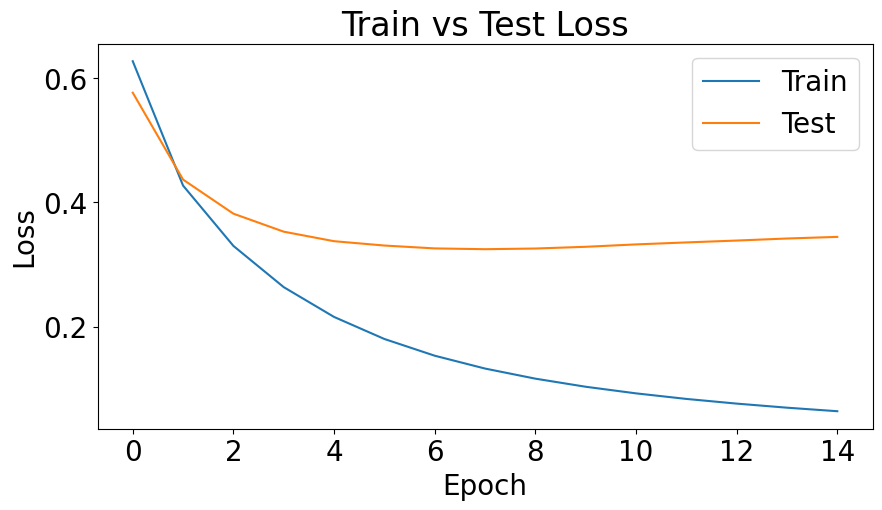

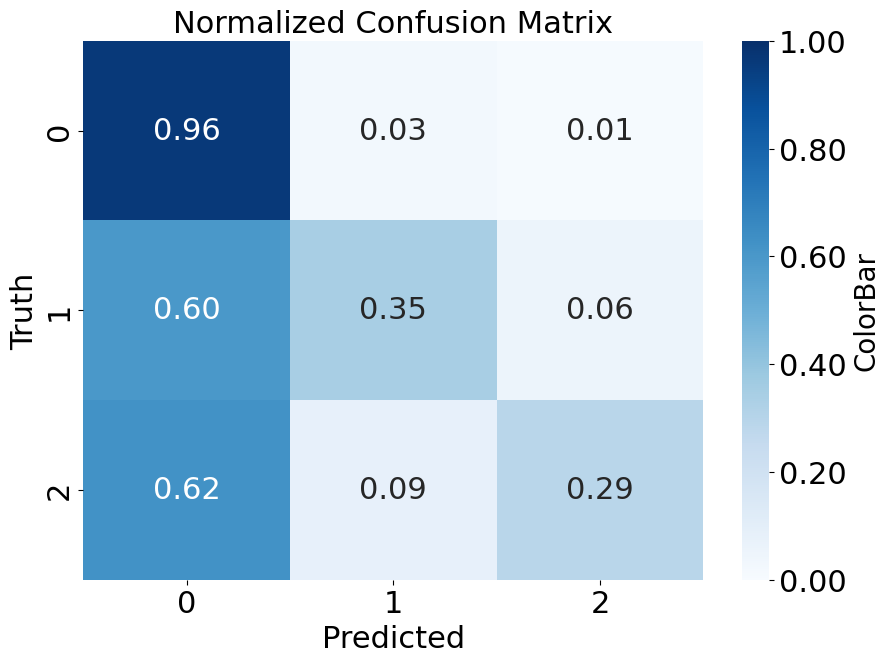

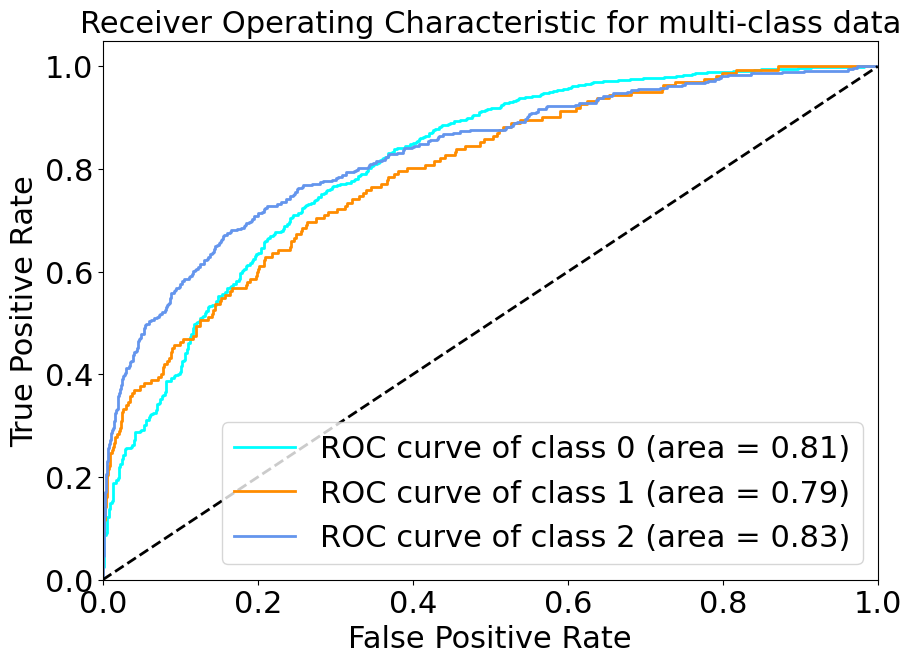

In [21]:
# Run the MLP model
num_train_epochs = 15
model, train_losses, validation_losses = run_MLP(
    X_train, X_test, y_train, y_test, batch_size=100, 
    learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

# Plot train and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(num_train_epochs), train_losses, label='Train')
plt.plot(range(num_train_epochs), validation_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Test Loss')
plt.show()

# Predict probabilities for the test data
probs = model.predict_proba(X_test)

# Calculate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# one-time AUC and cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

# Set global font size
plt.rcParams.update({'font.size': 20})

# Normalize the confusion matrix
cm_normalized = normalize(cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 22}, vmin=0, vmax=1, 
            cbar_kws={'label': 'ColorBar', 'format': '%.2f'}) # Set color bar limits   # Change color bar font size
plt.xlabel('Predicted', fontsize=22)
plt.ylabel('Truth', fontsize=22)
plt.title('Normalized Confusion Matrix', fontsize=22)

# Change color bar label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)

# Change axis tick label size
ax.tick_params(axis='both', which='major', labelsize=22)

#plt.savefig('confusion_matrix', dpi = 600)
plt.show()

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
fig, ax = plt.subplots(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    ax.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=22) # Change font size
ax.set_ylabel('True Positive Rate', fontsize=22)  # Change font size
ax.set_title('Receiver Operating Characteristic for multi-class data', fontsize=22) # Change font size
ax.legend(loc="lower right", fontsize=22) 

# Change axis tick label size
ax.tick_params(axis='both', which='major', labelsize=22)

#plt.savefig('AUC', dpi = 600)
plt.show()

### R limited 

In [22]:
def R_split(common_gene_list, train_ratio, neg_ratio):
    random.seed(42)
    
    # 按照8:2比例随机划分基因
    random.shuffle(common_gene_list)
    split_index = int(train_ratio * len(common_gene_list))

    train_gene_set = common_gene_list[:split_index]
    test_gene_set = common_gene_list[split_index:]
    
    ## 划分正样本集合
    DD_DU_train = {}
    # Load spreadsheet
    xl = pd.ExcelFile('all_cancer_pair.xlsx')

    df = xl.parse(xl.sheet_names[0], skiprows=3)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[0] in train_gene_set:
            DD_DU_train[row[0], row[1]] = 1

    df = xl.parse(xl.sheet_names[2], skiprows=2)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[0] in train_gene_set:
            DD_DU_train[row[0], row[1]] = 2

    DD_DU_test = {}
    # Load spreadsheet
    xl = pd.ExcelFile('all_cancer_pair.xlsx')

    df = xl.parse(xl.sheet_names[0], skiprows=3)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[0] in test_gene_set:
            DD_DU_test[row[0], row[1]] = 1
        # DD_DU_train[row[0], row[1]] = 1

    df = xl.parse(xl.sheet_names[2], skiprows=2)
    for index, row in df.iterrows():
    # Use the first and second column values as a key, and set the value as 1
        if row[0] in test_gene_set:
            DD_DU_test[row[0], row[1]] = 2

    #print(len(DD_DU_test), len(DD_DU_train))
    DD_DU_all = set(DD_DU_train.keys()) | set(DD_DU_test.keys())
    
    
    ## 划分负样本集合
    # random.seed(127)
    DU_DD_ra_train = {}
    for i in range(neg_ratio * len(DD_DU_train)):
        b = train_gene_set[ random.randint(0, len(train_gene_set)-1) ]
        a = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]

        while a == b or (b, a) in DD_DU_all or (b, a) in DU_DD_ra_train:
            b = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]
        DU_DD_ra_train[b,a] = 0

    DU_DD_ra_test = {}
    for i in range(neg_ratio * len(DD_DU_test)):
        b = test_gene_set[ random.randint(0, len(test_gene_set)-1) ]
        a = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]

        while a == b or (b, a) in DD_DU_all or (b, a) in DU_DD_ra_test:
            b = common_gene_list[ random.randint(0, len(common_gene_list)-1) ]
        DU_DD_ra_test[b,a] = 0

    return DD_DU_train, DD_DU_test, DU_DD_ra_train, DU_DD_ra_test

In [23]:
common_gene_list = get_common_gene()
DD_DU_train, DD_DU_test, DU_DD_ra_train, DU_DD_ra_test = R_split(common_gene_list, train_ratio=0.8, neg_ratio=10)
X_train, y_train, X_test, y_test = build_train_test(DD_DU_train, DD_DU_test, DU_DD_ra_train, DU_DD_ra_test)


cds_dic: 19852
pep_dic: 19852
common_gene_list 19852


/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


train_loss 0.623 validation_loss 0.604
train_loss 0.42 validation_loss 0.463
train_loss 0.315 validation_loss 0.421
train_loss 0.244 validation_loss 0.387
train_loss 0.196 validation_loss 0.365
train_loss 0.162 validation_loss 0.351
train_loss 0.138 validation_loss 0.343
train_loss 0.119 validation_loss 0.339
train_loss 0.105 validation_loss 0.339
train_loss 0.093 validation_loss 0.341
train_loss 0.083 validation_loss 0.344
train_loss 0.075 validation_loss 0.349
train_loss 0.069 validation_loss 0.354
train_loss 0.063 validation_loss 0.361
train_loss 0.058 validation_loss 0.368


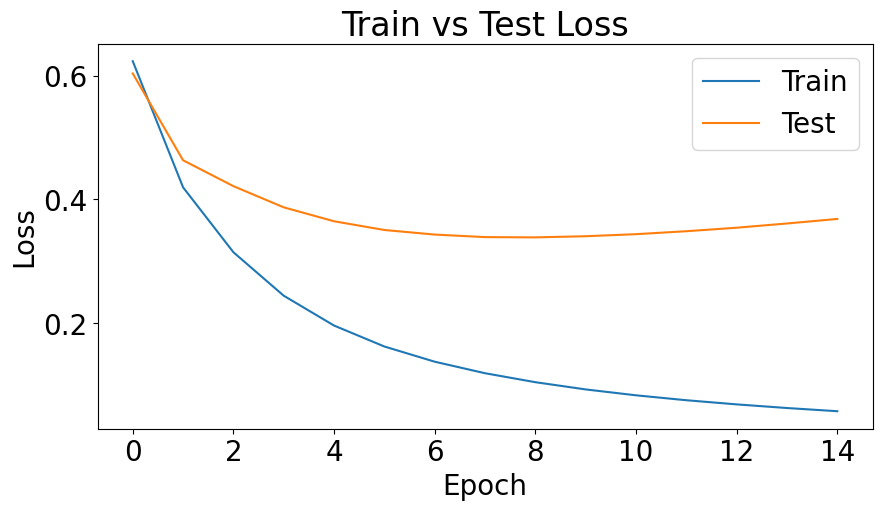

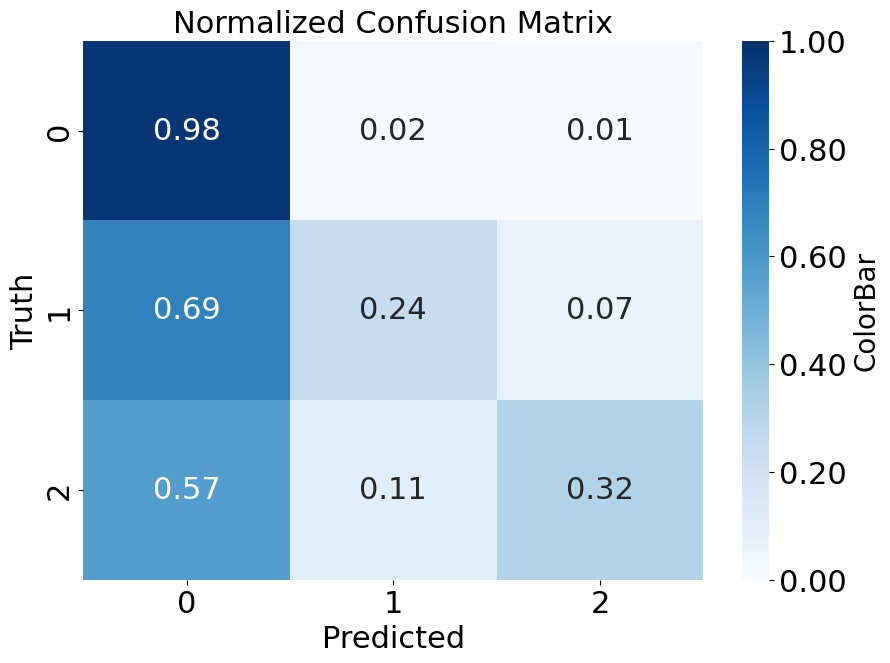

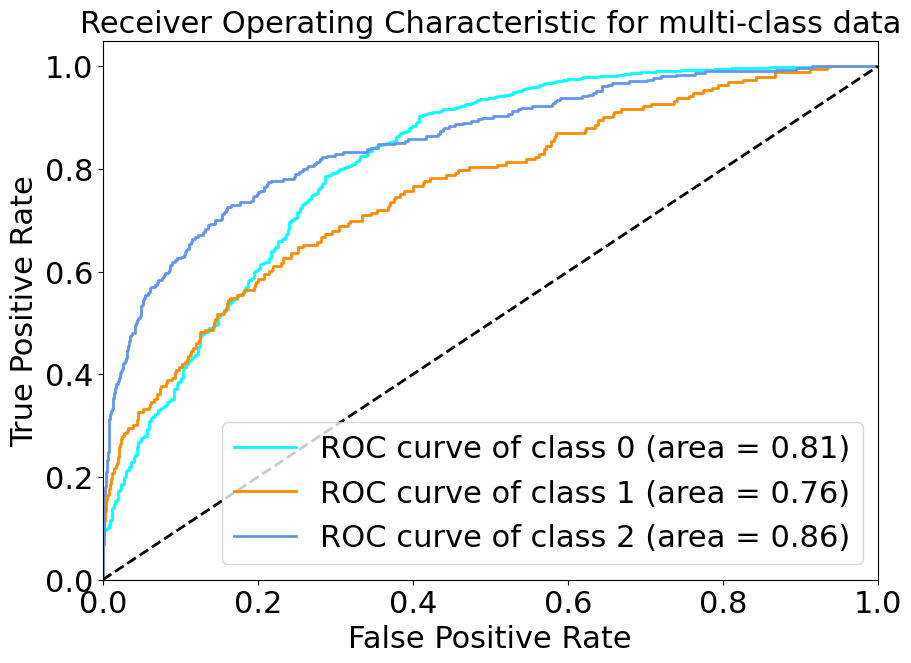

In [24]:
# Run the MLP model
num_train_epochs = 15
model, train_losses, validation_losses = run_MLP(
    X_train, X_test, y_train, y_test, batch_size=100, 
    learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

# Plot train and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(num_train_epochs), train_losses, label='Train')
plt.plot(range(num_train_epochs), validation_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Test Loss')
plt.show()

# Predict probabilities for the test data
probs = model.predict_proba(X_test)

# Calculate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# one-time AUC and cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

# Set global font size
plt.rcParams.update({'font.size': 20})

# Normalize the confusion matrix
cm_normalized = normalize(cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 22}, vmin=0, vmax=1, 
            cbar_kws={'label': 'ColorBar', 'format': '%.2f'}) # Set color bar limits   # Change color bar font size
plt.xlabel('Predicted', fontsize=22)
plt.ylabel('Truth', fontsize=22)
plt.title('Normalized Confusion Matrix', fontsize=22)

# Change color bar label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)

# Change axis tick label size
ax.tick_params(axis='both', which='major', labelsize=22)

#plt.savefig('confusion_matrix', dpi = 600)
plt.show()

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
fig, ax = plt.subplots(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    ax.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=22) # Change font size
ax.set_ylabel('True Positive Rate', fontsize=22)  # Change font size
ax.set_title('Receiver Operating Characteristic for multi-class data', fontsize=22) # Change font size
ax.legend(loc="lower right", fontsize=22) 

# Change axis tick label size
ax.tick_params(axis='both', which='major', labelsize=22)

#plt.savefig('AUC', dpi = 600)
plt.show()